In [ ]:
import numpy as np
import pandas as pd
!pip install tweepy==4
import tweepy
from google.colab import drive
#!pip install textblob
#!python -m textblob.download_corpora
!pip install tensorflow-text
drive.mount("/content/gdrive")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 2.0 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.13.0
    Uninstalling tweepy-4.13.0:
      Successfully uninstalled tweepy-4.13.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 18.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML JComp/FinalCovidTweets.csv",encoding="utf8")
df

<ipython-input-3-f8f93e9ab9e5>:1: DtypeWarning: Columns (0,1,6,7,8,9,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML JComp/FinalCovidTweets.csv",encoding="utf8")


,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0.0,0,False,0.125000,0.00,Neutral
1,2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0.0,0,False,0.033333,0.00,Neutral
2,6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0.0,4,False,0.500000,-0.10,Negative
3,9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0.0,0,False,0.000000,0.00,Neutral
4,10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0.0,0,False,0.333333,0.25,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116064,228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0.0,0,False,0.400000,0.20,Positive
116065,228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0.0,1,False,0.800000,0.40,Positive
116066,228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0.0,0,False,0.400000,0.20,Positive
116067,228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0.0,0,False,0.000000,0.00,Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116069 entries, 0 to 116068
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             116069 non-null  object 
 1   id                     116068 non-null  object 
 2   user_name              116068 non-null  object 
 3   user_location          116068 non-null  object 
 4   user_description       116068 non-null  object 
 5   user_created           116060 non-null  object 
 6   user_followers         116060 non-null  object 
 7   user_friends           116060 non-null  object 
 8   user_favourites        116060 non-null  object 
 9   user_verified          116057 non-null  object 
 10  date                   116057 non-null  object 
 11  text                   116057 non-null  object 
 12  hashtags               116054 non-null  object 
 13  source                 116054 non-null  object 
 14  retweets               116054 non-nu

In [ ]:
df.drop(['id','user_created','user_name','is_retweet','user_followers','user_description','user_friends','user_favourites','date','source','favorites'],axis="columns",inplace=True)
df.isna().sum()

Unnamed: 0                0
user_location             1
user_verified            12
text                     12
hashtags                 15
retweets                 15
TextBlob_Subjectivity    23
TextBlob_Polarity        23
Sentiment                23
dtype: int64

In [ ]:
df.shape

(116069, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116069 entries, 0 to 116068
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             116069 non-null  object 
 1   user_location          116068 non-null  object 
 2   user_verified          116057 non-null  object 
 3   text                   116057 non-null  object 
 4   hashtags               116054 non-null  object 
 5   retweets               116054 non-null  float64
 6   TextBlob_Subjectivity  116046 non-null  float64
 7   TextBlob_Polarity      116046 non-null  float64
 8   Sentiment              116046 non-null  object 
dtypes: float64(3), object(6)
memory usage: 8.0+ MB


In [ ]:
df.dropna(subset=["user_location","user_verified","retweets","Sentiment","text","user_verified"],inplace=True)
df.drop_duplicates(subset="text",inplace=True)
df.shape

(115838, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115838 entries, 0 to 116068
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             115838 non-null  object 
 1   user_location          115838 non-null  object 
 2   user_verified          115838 non-null  object 
 3   text                   115838 non-null  object 
 4   hashtags               115838 non-null  object 
 5   retweets               115838 non-null  float64
 6   TextBlob_Subjectivity  115838 non-null  float64
 7   TextBlob_Polarity      115838 non-null  float64
 8   Sentiment              115838 non-null  object 
dtypes: float64(3), object(6)
memory usage: 8.8+ MB


In [ ]:
df.head()

,Unnamed: 0,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,Neutral
1,2,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,Neutral
2,6,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,Negative
3,9,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,Neutral
4,10,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,Positive


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sentiment']=le.fit_transform(df["Sentiment"])
y=df['Sentiment']
df.reset_index(inplace=True)
df.head()

,index,Unnamed: 0,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,1
1,1,2,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,1
2,2,6,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,0
3,3,9,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,1
4,4,10,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,2


Output Sentiment is<br> 
0 - Negative<br>
1 - Neutral<br>
2 - Positive<br>


In [ ]:
df

,index,Unnamed: 0,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,1
1,1,2,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,1
2,2,6,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,0
3,3,9,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,1
4,4,10,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,2
...,...,...,...,...,...,...,...,...,...,...
115833,116064,228202,"Bengaluru, India",False,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0.0,0.400000,0.20,2
115834,116065,228203,"Bengaluru, India",False,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",0.0,0.800000,0.40,2
115835,116066,228204,"Bengaluru, India",False,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0.0,0.400000,0.20,2
115836,116067,228205,Southern Africa,False,They promote their Vaccines leaving out the st...,['SputnikV'],0.0,0.000000,0.00,1


In [ ]:
df.drop(["Unnamed: 0","index"],axis="columns",inplace=True)

In [ ]:
df.head()

,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,1
1,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,1
2,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,0
3,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,1
4,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,2


Text(0.5, 1.0, 'Class Distribution')

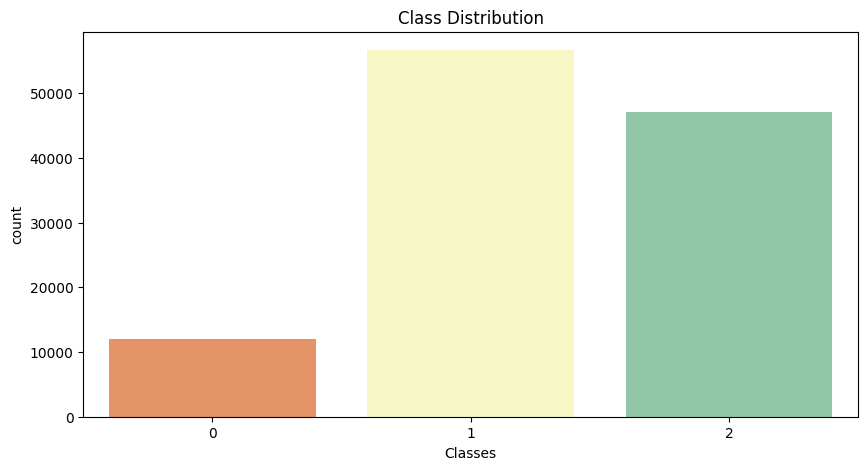

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df.Sentiment, palette='Spectral')
plt.xlabel('Classes')
plt.title('Class Distribution')

<h3>Balance the Dataset

In [ ]:
df.Sentiment.value_counts()

1    56687
2    47130
0    12021
Name: Sentiment, dtype: int64

In [ ]:
df=df.groupby('Sentiment').head(6000)

Text(0.5, 1.0, 'Class Distribution')

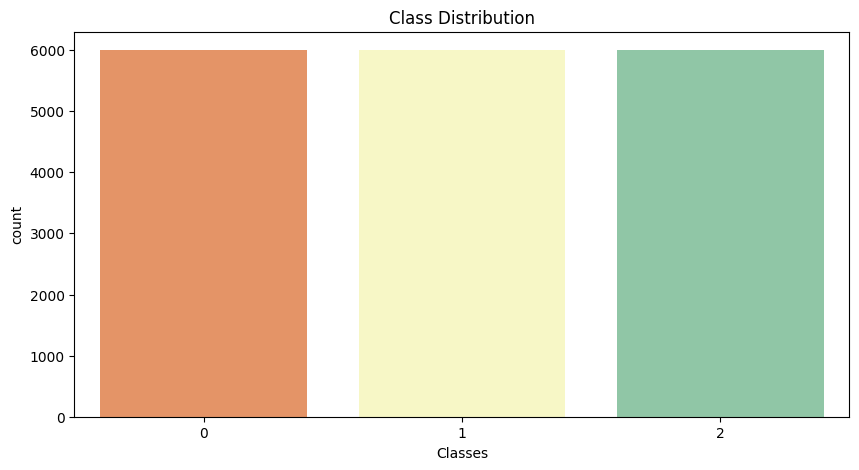

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df.Sentiment, palette='Spectral')
plt.xlabel('Classes')
plt.title('Class Distribution')

In [ ]:
df.reset_index(inplace=True)
df.head()

,index,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,1
1,1,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,1
2,2,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,0
3,3,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,1
4,4,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,2


In [ ]:
df.drop(['index'],axis='columns',inplace=True)

<ipython-input-38-d559b54c10e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index'],axis='columns',inplace=True)


<h1>Data Preprocessing (Tweet text Cleaning)

In [ ]:
import re
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.util import *
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
wordnet = WordNetLemmatizer()

In [ ]:
df.isnull().sum()

user_location            0
user_verified            0
text                     0
hashtags                 0
retweets                 0
TextBlob_Subjectivity    0
TextBlob_Polarity        0
Sentiment                0
dtype: int64

12179    Mass vaccination against #coronavirus to kick ...
12180    Has anyone else had a side effect of #acne aft...
12181    Today? Today I got to vaccinate. Today was a v...
12182    #Israel may begin vaccinating children aged 12...
12183    Good!  The protocol should not be changed - \n...
12184    @DavidsonDyl @sunlorrie Good!  The protocol sh...
12185    Science is neat! First of two done. #CovidVacc...
12186    Educators became eligible this week in Wiscons...
12187    Second #COVIDVaccination due next Tuesday! 💉 #...
12188    @drR_Simpson @DrM27518779 @ecgrhythms Wrong as...
Name: text, dtype: object


In [ ]:
corpus=[]
for i in range(0, len(df['text'])):
    print(i,df['text'][i])
    review = re.sub(r'http\S+',' ', df['text'][i])#To remove any url
    review = re.sub(r'pic.twitter.com/[\w]*',' ', review)# To remove any pic from tweet
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split() # to make a list of words
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
corpus[0]

Streaming output truncated to the last 5000 lines.
14864 @CBCAlerts Moscow Russia everything is open business as usual. Ontario Canada is reporting 2333 cases of #COVID19 7… https://t.co/tLvfRGDFuj
14865 Austria led by @sebastiankurz in Russian Vassal Status 
Now soon Austria seem to waste taxpayer funds on #SputnikV… https://t.co/h63ylJpXnd
14866 As millions wait to get vaccinated &amp; we wrangle over the price of #SputnikV for past number of weeks &amp; debate role… https://t.co/DelzCUmEXj
14867 Who is eating alone today because Doug Ford and Trudeau Toronto Ontario Canada forced you to stay home #lockdown no… https://t.co/s8LZFGIUwa
14868 @DanielKorski Absolutely no side effects... #SputnikV https://t.co/aRPve0Ic8r
14869 @CBCAlerts Moscow Russia everything is open business as usual. Ontario Canada is reporting 2333 cases of #COVID19 7… https://t.co/JyetKHTcwx
14870 Moscow Russia everything is open business as usual. Ontario Canada is reporting 2333 cases of #COVID19 785  new cas… h

'folk said daikon paste could treat cytokine storm pfizerbiontech'

In [ ]:
corpus

['folk said daikon paste could treat cytokine storm pfizerbiontech',
 'coronavirus sputnikv astrazeneca pfizerbiontech moderna covid russian vaccine created last year',
 'bit sad claim fame success vaccination patriotic competition usa canada uk',
 'covidvaccine state start getting covid vaccine monday u say pakustv nyc healthcare globalgoals',
 'death closing mark million people wait pfizerbiontech vaccine first u',
 'trump announces vaccine rollout le hour first american vaccinated',
 'updated yellowfever amp covid immunitypassports part two sarscov pfizerbiontech britain december',
 'coronavirus iran report new case death last hour iran coronavirus pfizerbiontech',
 'pfizer rake billion expensive covidvaccine albertbourla refuse cut price lowe',
 'trump administration failed deliver vaccine promise shocker covidiots coronavirus covidvaccine',
 'anyone wondering day pfizerbiontech approval uk people getting vaccinated tol',
 'trump announces vaccine rollout le hour first american vac

In [ ]:
print("Original Tweet: ",df['text'][0])
print("Preprocessed tweet: ",corpus[0])
len(df)

Original Tweet:  Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
Preprocessed tweet:  folk said daikon paste could treat cytokine storm pfizerbiontech


18000

In [ ]:
#Visualize and view the most common words in tweets
word_list=[word for line in corpus for word in line.split()]
count_words=Counter(word_list).most_common(50)
words=pd.DataFrame(count_words)
words.columns=['word','freq']
px.bar(words, x='word', y='freq', title='Most Common Words')

In [ ]:
preprocessed=pd.DataFrame(corpus)
df=df.assign(Clean=corpus)
df

,user_location,user_verified,text,hashtags,retweets,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment,Clean
0,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0.0,0.125000,0.00,1,folk said daikon paste could treat cytokine st...
1,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0.0,0.033333,0.00,1,coronavirus sputnikv astrazeneca pfizerbiontec...
2,"Austria, Ukraine and Kosovo",False,it is a bit sad to claim the fame for success ...,['vaccination'],0.0,0.500000,-0.10,0,bit sad claim fame success vaccination patriot...
3,Islamabad,False,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",0.0,0.000000,0.00,1,covidvaccine state start getting covid vaccine...
4,Turkey-Israel,False,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",0.0,0.333333,0.25,2,death closing mark million people wait pfizerb...
...,...,...,...,...,...,...,...,...,...
17995,"Toronto, Canada and Worldwide",False,@JustinTrudeau Canada stop politicizing #vacci...,"['vaccine', 'lockdown']",0.0,0.100000,-0.10,0,justintrudeau canada stop politicizing vaccine...
17996,"Toronto, Canada and Worldwide",False,@MailOnline Canada stop politicizing #vaccine ...,"['vaccine', 'lockdown']",0.0,0.100000,-0.10,0,mailonline canada stop politicizing vaccine to...
17997,"Toronto, Canada and Worldwide",False,@fordnation Canada stop politicizing #vaccine ...,"['vaccine', 'lockdown']",0.0,0.100000,-0.10,0,fordnation canada stop politicizing vaccine to...
17998,"Toronto, Canada and Worldwide",False,@CBCNL @CBCNews Canada stop politicizing #vacc...,"['vaccine', 'lockdown']",0.0,0.100000,-0.10,0,cbcnl cbcnews canada stop politicizing vaccine...


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Embedding, SpatialDropout1D,Flatten, Dropout

In [ ]:
#Initialize the Tensorflow Tokenizer
max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Clean'].values)
df_train,df_val=df[df["Clean"].eq("train")],df[df["Sentiment"].eq("validation")]

In [ ]:
df['Clean']

0        folk said daikon paste could treat cytokine st...
1        coronavirus sputnikv astrazeneca pfizerbiontec...
2        bit sad claim fame success vaccination patriot...
3        covidvaccine state start getting covid vaccine...
4        death closing mark million people wait pfizerb...
                               ...                        
17995    justintrudeau canada stop politicizing vaccine...
17996    mailonline canada stop politicizing vaccine to...
17997    fordnation canada stop politicizing vaccine to...
17998    cbcnl cbcnews canada stop politicizing vaccine...
17999    oneillyatescbc cbcalerts canada stop politiciz...
Name: Clean, Length: 18000, dtype: object

In [ ]:
voc_size = 3000# Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
epochs = 50  # Number of epochs to train the model for
batch = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 24  # Maximum number of words in a sequence


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Clean,df.Sentiment,test_size=0.1,random_state=42)
samplecheck=X_test.reset_index()

In [ ]:
samplecheck

,index,Clean
0,2574,uncertainty week covid jab interval intensifie...
1,7496,also thursday ceo astrazeneka moderna curevac ...
2,9210,finally see brighter future lucky enough recei...
3,5456,shot chaser officially vaccinated moderna vacc...
4,736,one week receiving pfizerbiontech covid vaccin...
...,...,...
1795,9542,got moderna covid vaccine today cv
1796,8260,well seems oxfordastrazeneca astrazeneca prove...
1797,6108,icymi jim tweeting reaction moderna vaccine sc...
1798,3204,study show oxfordastrazeneca covid vaccine le ...


In [ ]:
#Tokenizing the preprocessed tweets, i.e. converting the text into vectors
tk = Tokenizer(num_words=voc_size,
filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [ ]:
X_train_seq

[[1472, 20, 6, 13, 227, 16, 465, 887, 98, 4],
 [507, 64, 1473, 3],
 [260, 18, 20, 498, 18, 275, 26, 3],
 [27, 310, 1, 33, 57, 29, 2, 37, 29, 120, 248, 134, 176],
 [339, 934, 222, 207, 185, 190, 152, 120, 33, 27, 95],
 [1258, 356, 1947, 1, 1029, 41, 223, 218, 1404],
 [5, 1474, 1194, 34, 35, 17, 54, 422],
 [2551, 233, 2091, 1136, 570, 1475, 4, 1405, 1195],
 [1, 73, 30, 199],
 [185, 190, 152, 1083, 1196, 92, 996, 127, 36, 228, 585, 997, 603, 134],
 [400, 549, 935, 2, 2, 1, 3, 9],
 [667, 27, 95, 101, 65, 65, 92, 127, 36, 134, 116],
 [1948, 47, 755, 798, 1476, 1, 17, 22, 325, 311, 229, 180, 1406],
 [199, 269, 17, 30, 1, 111, 712, 76, 156],
 [3, 11, 3, 1, 8, 6, 146, 498, 538, 241],
 [54, 306, 269, 53, 998, 229, 290, 3, 1],
 [1783, 112, 3, 1, 119, 423, 474, 165, 3, 433, 1570, 88, 329],
 [646, 233, 2092, 1, 529, 530, 5, 3],
 [616, 362, 647, 434, 132, 1030, 4],
 [1674, 228, 20, 6, 98, 181, 133, 119, 126, 146, 5],
 [11, 3, 326, 173, 20, 23, 149, 104, 275, 11, 20, 117],
 [208, 149, 2, 13, 356, 19

In [ ]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [ ]:
X_train_seq_trunc[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1472,   20,    6,   13,  227,   16,  465,  887,
         98,    4], dtype=int32)

In [ ]:
len(X_train_seq_trunc)

16200

In [ ]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train, test_size=0.1, random_state=37)

In [ ]:
#Building the model with Embedding layer, LSTM(100 neurons) and a Dense Layer(3 neurons)
model = Sequential()
model.add(Embedding(voc_size, 8, input_length=MAX_LEN))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam'
                  , loss='sparse_categorical_crossentropy'
                  , metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 8)             24000     
                                                                 
 lstm (LSTM)                 (None, 100)               43600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 67,903
Trainable params: 67,903
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model.fit(X_train_emb, y_train_emb,epochs=epochs,batch_size=batch,validation_data=(X_valid_emb, y_valid_emb))

Epoch 1/50
29/29 [==============================] - 12s 273ms/step - loss: 1.0901 - accuracy: 0.4075 - val_loss: 1.0596 - val_accuracy: 0.5086
Epoch 2/50
29/29 [==============================] - 5s 157ms/step - loss: 0.9881 - accuracy: 0.5343 - val_loss: 0.9127 - val_accuracy: 0.5802
Epoch 3/50
29/29 [==============================] - 6s 219ms/step - loss: 0.8154 - accuracy: 0.6321 - val_loss: 0.7724 - val_accuracy: 0.6599
Epoch 4/50
29/29 [==============================] - 4s 151ms/step - loss: 0.6432 - accuracy: 0.7321 - val_loss: 0.6227 - val_accuracy: 0.7475
Epoch 5/50
29/29 [==============================] - 5s 180ms/step - loss: 0.5086 - accuracy: 0.8021 - val_loss: 0.5761 - val_accuracy: 0.7605
Epoch 6/50
29/29 [==============================] - 6s 204ms/step - loss: 0.4251 - accuracy: 0.8418 - val_loss: 0.5594 - val_accuracy: 0.7920
Epoch 7/50
29/29 [==============================] - 5s 163ms/step - loss: 0.3797 - accuracy: 0.8641 - val_loss: 0.5314 - val_accuracy: 0.8025
Epoch

In [ ]:
model.evaluate(X_test_seq_trunc,y_test)

57/57 [==============================] - 0s 8ms/step - loss: 1.0911 - accuracy: 0.8072


[1.091072678565979, 0.8072222471237183]

In [ ]:
y_pred=model.predict(X_test_seq_trunc)

57/57 [==============================] - 3s 13ms/step


In [ ]:
y_pred

array([[1.3838030e-04, 9.9956030e-01, 3.0140180e-04],
       [9.9977899e-01, 2.2042898e-04, 6.3165822e-07],
       [3.3294132e-09, 3.6982758e-08, 9.9999994e-01],
       ...,
       [9.9999887e-01, 7.1729190e-08, 1.0115635e-06],
       [9.9058431e-01, 1.1006166e-05, 9.4047086e-03],
       [1.0601448e-02, 9.8601592e-01, 3.3825710e-03]], dtype=float32)

In [ ]:
print(y_pred[1])
print(samplecheck.loc[1]["Clean"])
print(np.argmax(y_pred[1]))

[9.9977899e-01 2.2042898e-04 6.3165822e-07]
also thursday ceo astrazeneka moderna curevac novovax expected speak europarl en committee public health
0


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

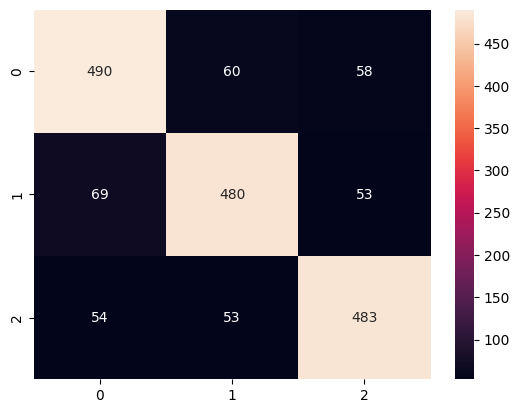

In [ ]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred.argmax(1))
f = sns.heatmap(cm, annot=True, fmt='d')

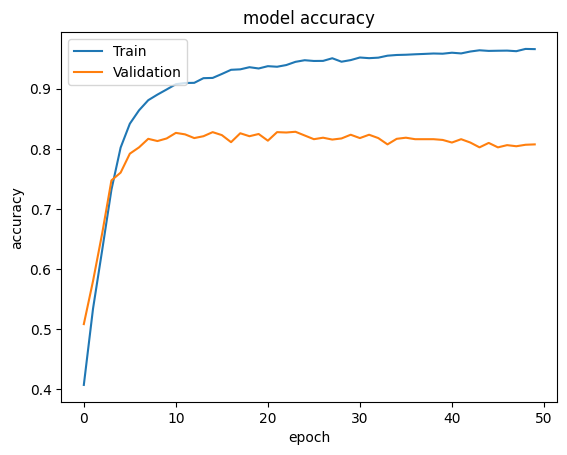

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

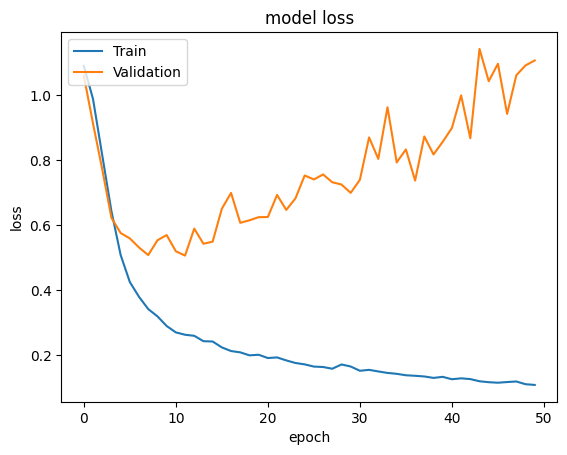

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred.argmax(1))

0.8072222222222222

# Twitter

In [ ]:
#Twitter API Credentials
apikey="itmDtJmiLa3D8WFPm5YwCdO2h"
apisecretkey="gcJrsZtvzMTsIwmN61DFJnQOKJ7jxNsMtrg4GCo1Dhoo8P602s"
bearertoken="AAAAAAAAAAAAAAAAAAAAANa%2BhQEAAAAA5EPhXNgirX0Ek3zFouDaLbAGiyY%3DprzuUv7W3etgxPqn7HZqGDRtFdN3D2wgLA5oxtLxJmFN3vr4QQ"
accesstoken="1551179372052480000-mJlEPuolbsyWm1bqDGZjCEccsek7C3"
accesstokensecret="kZFKvsBVIFf5T6Cfb9amjSgxfSdMlX9dSisPa5woHJLdp"

In [ ]:
client=tweepy.Client(bearer_token=bearertoken)

In [ ]:
#Preprocessing and Tokenizing the tweets
def clean_tweet(tweet):
  review = re.sub(r'http\S+',' ', tweet)#To remove any url
  review = re.sub(r'pic.twitter.com/[\w]*',' ', review)# To remove any pic from tweet
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
  #review = review.split() # to make a list of words
  #print(review)
  return review

def token_predict(tweet):
  tweet_token=tk.texts_to_sequences(tweet)
  #print(tweet_token)
  tk.fit_on_texts(tweet)
  #print(model.predict(tweet_token_pad))
  tweet_token_pad=pad_sequences(tweet_token, maxlen=MAX_LEN)
  return tweet_token_pad

In [ ]:
query="Covaxin -is:retweet"
#response=client.search_recent_tweets(query=query,max_results=100,tweet_fields=['lang'],sort_order="relevancy")
response=tweepy.Paginator(client.search_recent_tweets, query=query,tweet_fields=['lang'], max_results=100).flatten(limit=1000)
Covaxin_data=[]
print(response)
for tweet in response:
  if(tweet.lang=="en"):
    Covaxin_data.append(clean_tweet(tweet.text))
print(len(Covaxin_data))
arr=np.asarray(Covaxin_data)

<generator object Paginator.flatten at 0x7f5747fd5a50>
800


In [ ]:
predict=token_predict(Covaxin_data)
arr=np.array(token_predict(Covaxin_data))
arr.shape
Covaxin=model.predict(arr)

25/25 [==============================] - 0s 9ms/step


In [ ]:
Covaxin_sentiment={}
cnt1=0
cnt0=0
cnt2=2
for i in range(0,len(Covaxin)):
  if np.argmax(Covaxin[i])==1:
    cnt1+=1
  elif np.argmax(Covaxin[i])==2:
    cnt2+=1
  else:
    cnt0+=1
Covaxin_sentiment['1-Neutral']=cnt1
Covaxin_sentiment['2-Positive']=cnt2
Covaxin_sentiment['0-Negative']=cnt0
Covaxin_sentiment
#Visualization
labels = list(Covaxin_sentiment.keys())
values = list(Covaxin_sentiment.values())

fig = px.pie(values=values, names=labels,title='Covaxin')
fig.update_layout(
    autosize=False,
    width=550,
    height=550)
fig.show()

In [ ]:
query="Bharat Biotech -is:retweet"
biotech=[]
for i in range(0,4):
  response=tweepy.Paginator(client.search_recent_tweets, query=query,tweet_fields=['lang'], max_results=100).flatten(limit=1000)
  for tweet in response:
    if(tweet.lang=="en"):
      biotech.append(clean_tweet(tweet.text))
  arr=np.asarray(biotech)
print(len(biotech))

124


In [ ]:
predict=token_predict(biotech)
arr=np.array(token_predict(biotech))
#arr.shape
biotech=model.predict(arr)

4/4 [==============================] - 0s 10ms/step


In [ ]:
biotech_sentiment={}
cnt1=0
cnt0=0
cnt2=2
for i in range(0,len(biotech)):
  if np.argmax(biotech[i])==1:
    cnt1+=1
  elif np.argmax(biotech[i])==2:
    cnt2+=1
  else:
    cnt0+=1
biotech_sentiment['1-Neutral']=cnt1
biotech_sentiment['2-Positive']=cnt2
biotech_sentiment['0-Negative']=cnt0
biotech_sentiment
labels = list(biotech_sentiment.keys())
values = list(biotech_sentiment.values())

fig = px.pie(values=values, names=labels,title='Bharat Biotech')
fig.update_layout(
    autosize=False,
    width=550,
    height=550)
fig.show()

In [ ]:
query="Covishield -is:retweet"
covishield=[]
response=tweepy.Paginator(client.search_recent_tweets, query=query,tweet_fields=['lang'], max_results=100).flatten(limit=1000)
for tweet in response:
  if(tweet.lang=="en"):
    covishield.append(clean_tweet(tweet.text))
arr=np.asarray(covishield)
print(len(covishield))

predict=token_predict(covishield)
arr=np.array(token_predict(covishield))
#arr.shape
covishield=model.predict(arr)

110
4/4 [==============================] - 0s 8ms/step


In [ ]:
covishield_sentiment={}
cnt1=0
cnt0=0
cnt2=2
for i in range(0,len(covishield)):
  if np.argmax(covishield[i])==1:
    cnt1+=1
  elif np.argmax(covishield[i])==2:
    cnt2+=1
  else:
    cnt0+=1
covishield_sentiment['1-Neutral']=cnt1
covishield_sentiment['2-Positive']=cnt2
covishield_sentiment['0-Negative']=cnt0
covishield_sentiment
labels = list(covishield_sentiment.keys())
values = list(covishield_sentiment.values())

fig = px.pie(values=values, names=labels,title='Covishield')
fig.update_layout(
    autosize=False,
    width=550,
    height=550)
fig.show()